<a href="https://colab.research.google.com/github/darialrsm/KSVD/blob/main/%D0%A5%D0%B0%D1%85%D0%BB%D1%94%D0%B2%D0%B0_%D0%9B%D0%A0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 3. Візуалізація Matplotlib**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
df.head()

Saving spotify-2023.csv to spotify-2023 (3).csv


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Завдання 1

<ipython-input-31-0ae9a0459816>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_name', y='streams', data=top_10, palette='Purples', legend=False)


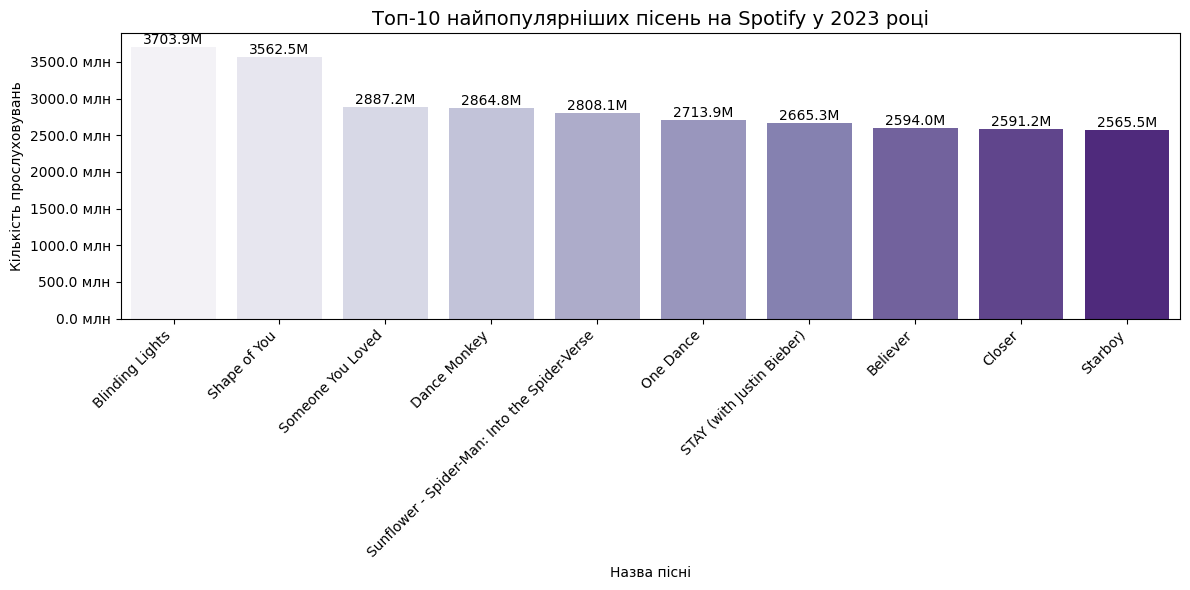

In [31]:
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
import matplotlib.ticker as ticker
df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
top_10 = df.sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='track_name', y='streams', data=top_10, palette='Purples', legend=False)
plt.title('Топ-10 найпопулярніших пісень на Spotify у 2023 році', fontsize=14)
plt.xlabel('Назва пісні')
plt.ylabel('Кількість прослуховувань')
plt.xticks(rotation=45, ha='right')

# Форматуємо ось Y у мільйонах
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f} млн'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Додаємо підписи до кожної колонки
for i, row in top_10.iterrows():
    plt.text(
        x=top_10.index.get_loc(i),
        y=row['streams'],
        s=f'{row["streams"] / 1e6:.1f}M',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

Завдання 2

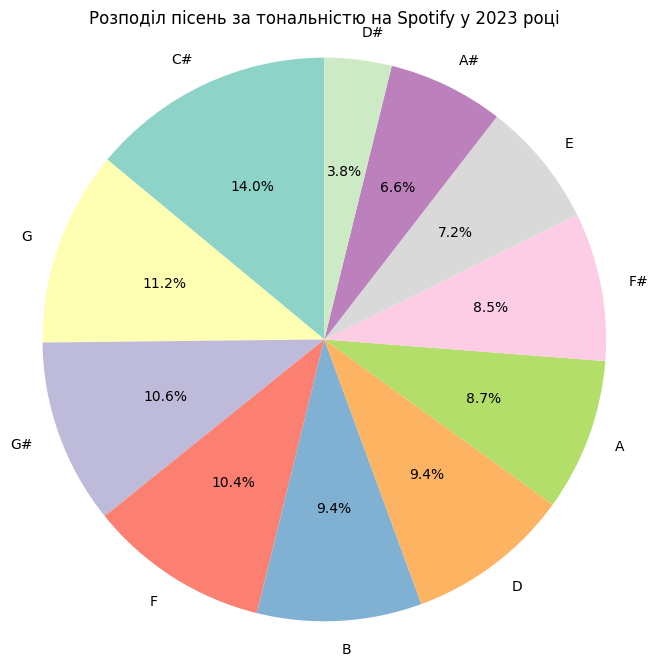

In [32]:
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
key_counts = df['key'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(key_counts, labels=key_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3(range(len(key_counts))))
plt.title('Розподіл пісень за тональністю на Spotify у 2023 році')
plt.axis('equal')
plt.show()

Завдання 3

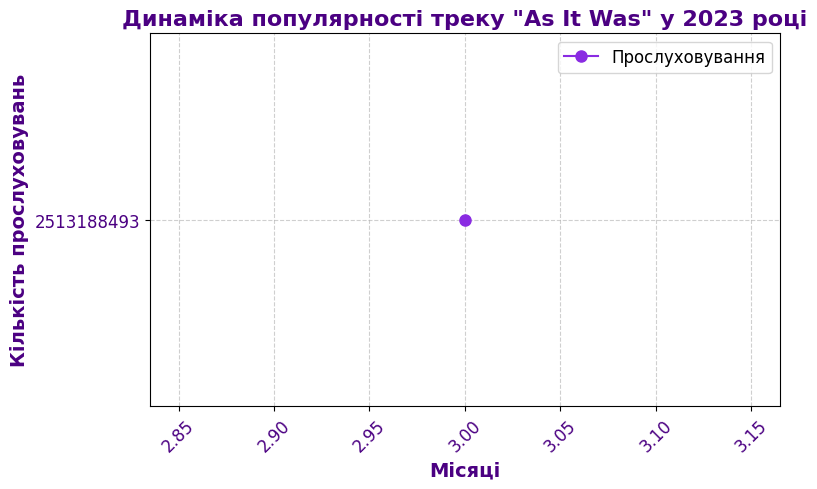

In [37]:
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
track_name = 'As It Was'
df_track = df[df['track_name'] == track_name]
df_track_sorted = df_track.sort_values(by=['released_month'])
plt.figure(figsize=(8, 5))
plt.plot(df_track_sorted['released_month'], df_track_sorted['streams'], marker='o', linestyle='-', color='#8A2BE2', label='Прослуховування', markersize=8)
plt.title(f'Динаміка популярності треку "{track_name}" у 2023 році', fontsize=16, weight='bold', color='#4B0082')
plt.xlabel('Місяці', fontsize=14, weight='bold', color='#4B0082')
plt.ylabel('Кількість прослуховувань', fontsize=14, weight='bold', color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

немє даних по прослуховуванням за конкретні місяці, тому графік виглядає так

Завдання 4

<ipython-input-34-66800faaaff8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist_count', y='artist(s)_name', data=top_10_artists, palette='Purples')


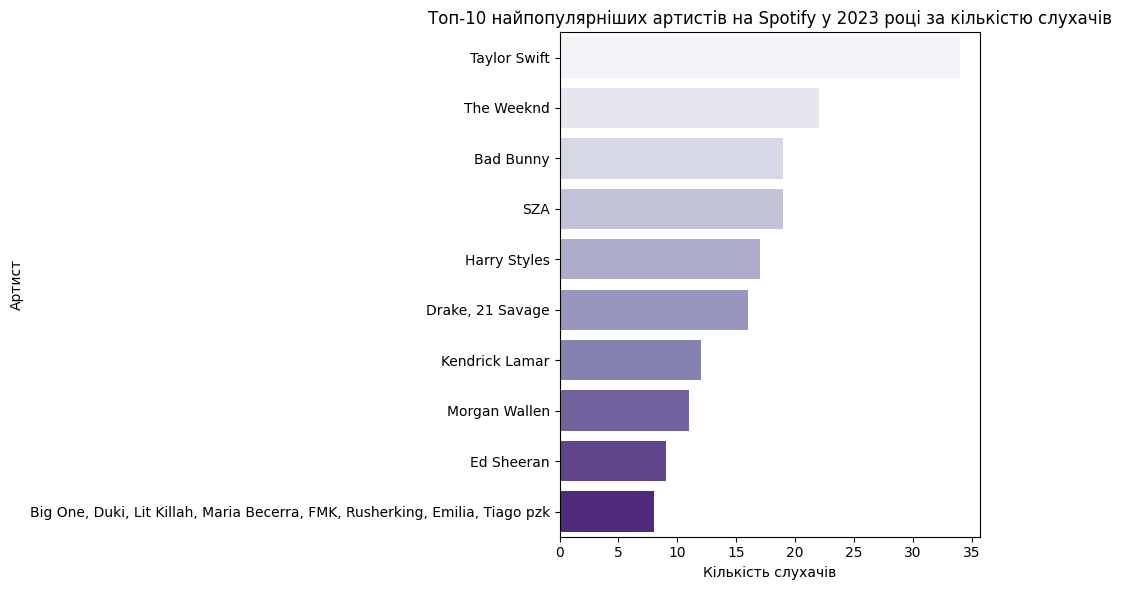

In [34]:
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
artist_streams = df.groupby('artist(s)_name')['artist_count'].sum().reset_index()
top_10_artists = artist_streams.sort_values(by='artist_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='artist_count', y='artist(s)_name', data=top_10_artists, palette='Purples')
plt.title('Топ-10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів')
plt.xlabel('Кількість слухачів')
plt.ylabel('Артист')
plt.tight_layout()
plt.show()

Завдання 5

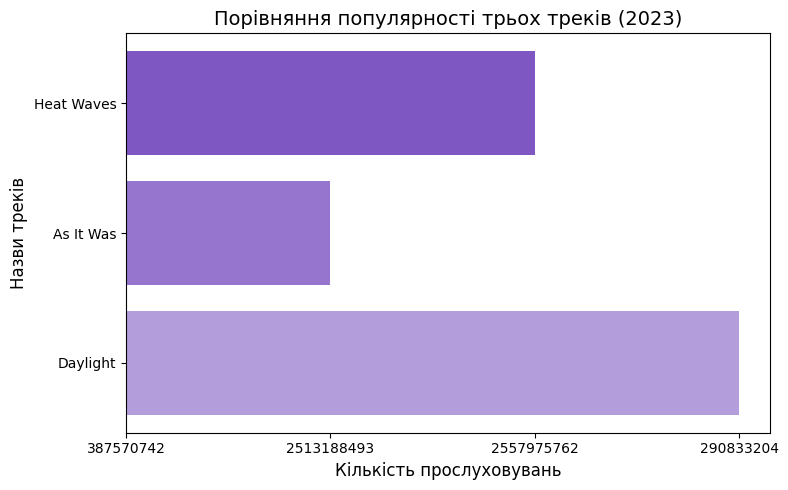

In [50]:
tracks = df[df['track_name'].isin(['As It Was', 'Daylight', 'Heat Waves'])]
colors = ['#b39ddb', '#9575cd', '#7e57c2']
plt.figure(figsize=(8, 5))
plt.barh(tracks['track_name'], tracks['streams'], color=colors)
plt.title('Порівняння популярності трьох треків (2023)', fontsize=14)
plt.xlabel('Кількість прослуховувань', fontsize=12)
plt.ylabel('Назви треків', fontsize=12)
plt.tight_layout()
plt.show()